# Bounding Box Visualizer

In [ ]:
pip install webcolors==1.3 --user

In [27]:
import cv2
import json
import webcolors
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

with open('detections/image-4.json') as FILE:
    detections = json.load(FILE)

print(json.dumps(detections['objects'][0], indent=4))

{
    "predictedClasses": [
        "person",
        "chair",
        "teddy bear",
        "sofa",
        "dog",
        "cat",
        "diningtable",
        "handbag",
        "bottle",
        "horse"
    ],
    "confidences": [
        0.9997019,
        9.041101e-05,
        4.9534065e-05,
        2.8544315e-05,
        1.7648663e-05,
        1.4100428e-05,
        8.065511e-06,
        7.890028e-06,
        7.1107734e-06,
        4.345046e-06
    ],
    "centerY": 373.0,
    "height": 476.0,
    "width": 290.0,
    "predictedClassNumbers": [
        0,
        56,
        77,
        57,
        16,
        15,
        60,
        26,
        39,
        17
    ],
    "centerX": 135.0
}


In [129]:
COLORS = [
    'AliceBlue', 'Chartreuse', 'Aqua', 'Aquamarine', 'Azure', 'Beige', 'Bisque',
    'BlanchedAlmond', 'BlueViolet', 'BurlyWood', 'CadetBlue', 'AntiqueWhite',
    'Chocolate', 'Coral', 'CornflowerBlue', 'Cornsilk', 'Crimson', 'Cyan',
    'DarkCyan', 'DarkGoldenRod', 'DarkGrey', 'DarkKhaki', 'DarkOrange',
    'DarkOrchid', 'DarkSalmon', 'DarkSeaGreen', 'DarkTurquoise', 'DarkViolet',
    'DeepPink', 'DeepSkyBlue', 'DodgerBlue', 'FireBrick', 'FloralWhite',
    'ForestGreen', 'Fuchsia', 'Gainsboro', 'GhostWhite', 'Gold', 'GoldenRod',
    'Salmon', 'Tan', 'HoneyDew', 'HotPink', 'IndianRed', 'Ivory', 'Khaki',
    'Lavender', 'LavenderBlush', 'LawnGreen', 'LemonChiffon', 'LightBlue',
    'LightCoral', 'LightCyan', 'LightGoldenRodYellow', 'LightGray', 'LightGrey',
    'LightGreen', 'LightPink', 'LightSalmon', 'LightSeaGreen', 'LightSkyBlue',
    'LightSlateGray', 'LightSlateGrey', 'LightSteelBlue', 'LightYellow', 'Lime',
    'LimeGreen', 'Linen', 'Magenta', 'MediumAquaMarine', 'MediumOrchid',
    'MediumPurple', 'MediumSeaGreen', 'MediumSlateBlue', 'MediumSpringGreen',
    'MediumTurquoise', 'MediumVioletRed', 'MintCream', 'MistyRose', 'Moccasin',
    'NavajoWhite', 'OldLace', 'Olive', 'OliveDrab', 'Orange', 'OrangeRed',
    'Orchid', 'PaleGoldenRod', 'PaleGreen', 'PaleTurquoise', 'PaleVioletRed',
    'PapayaWhip', 'PeachPuff', 'Peru', 'Pink', 'Plum', 'PowderBlue', 'Purple',
    'Red', 'RosyBrown', 'RoyalBlue', 'SaddleBrown', 'Green', 'SandyBrown',
    'SeaGreen', 'SeaShell', 'Sienna', 'Silver', 'SkyBlue', 'SlateBlue',
    'SlateGray', 'SlateGrey', 'Snow', 'SpringGreen', 'SteelBlue', 'GreenYellow',
    'Teal', 'Thistle', 'Tomato', 'Turquoise', 'Violet', 'Wheat', 'White',
    'WhiteSmoke', 'Yellow', 'YellowGreen'
]

In [138]:
def annotate_image(image, detection):
    """ Annotate images with object detection results
    # Arguments:
        image: numpy array representing the image used for detection
        detection: `DetectionResult` result from SKIL on the same image
    # Return value:
        annotated image as numpy array
    """
    if cv2 is None:
        raise Exception("OpenCV is not installed.")
    objects = detection.get('objects')
    if objects:
        for detect in objects:
            
            confs = detect.get('confidences')
            max_conf = max(confs)
            
            max_index = confs.index(max_conf)
            
            classes = detect.get('predictedClasses')
            max_class = classes[max_index]
            
            h = detect.get('height')
            w = detect.get('width')
            
            center_x = detect.get('centerX')
            center_y = detect.get('centerY')
            
            color_hex = COLORS[detect.get('predictedClassNumbers')[max_index]]
            color_rgb = webcolors.name_to_rgb(color_hex)
            
            upper = (int(center_x - w/2), int(center_y - h/2))
            lower = (int(center_x + w/2), int(center_y + h/2))
            
            cv2.rectangle(image, lower, upper, color_rgb, thickness=5)
            
            
            
            text = max_class + ": " + str(int(100*max(confs)))+"%"
            font = cv2.FONT_HERSHEY_SIMPLEX
            size = cv2.getTextSize(text, font, fontScale=1, thickness=2)
            text_width = size[0][0]
            text_height = size[0][1]
            
            cv2.rectangle(image, upper, (int(center_x - w/2)+text_width, int(center_y - h/2)-40), color_rgb, -1)
            
            cv2.putText(image, text, (int(center_x - w/2), int(center_y - h/2)-10), font, fontScale=1, color=0, thickness=2)
    return image

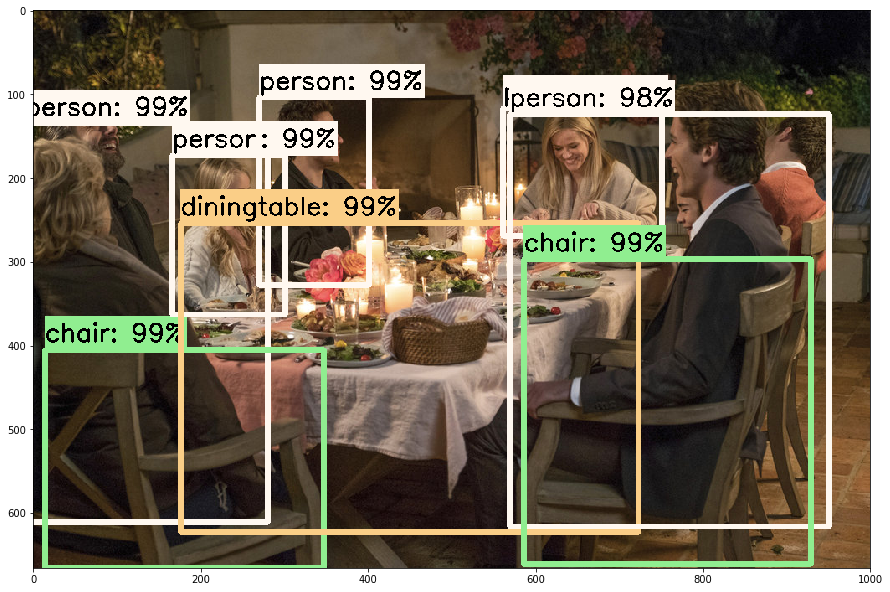

1: [person, 0.9997]
2: [chair, 0.9906]
3: [person, 0.99942]
4: [person, 0.99956]
5: [diningtable, 0.99665]
6: [person, 0.99606]
7: [person, 0.9842]
8: [chair, 0.99833]


In [139]:
image = annotate_image(cv2.imread("images/img-4.jpg"), detections)

cv2.imwrite('images/annotated.jpg', image)

plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

image.shape

for k, detection in enumerate(detections['objects']):
    predicted = detection['predictedClasses'][0]
    confidence = detection['confidences'][0]
    
    print('{}: [{}, {:.5}]'.format(k+1, predicted, confidence))